# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31021019/FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


# 2. Kiểm định: Giữa giá gạo ở National Average và thời gian có mối liên hệ với nhau hay không

In [4]:
# Lọc ra dữ liệu chứa "National Average" & "Rice - Retail"
df_rice = df.loc[(df.Place == "National Average") & (df.ProductName == "Rice - Retail")]

Tiến hành kiểm định:
- Do thời gian nhận giá trị tăng dần nên có thể được coi là một biến định lượng
- Thực hiện kiểm định pearson để tiến hành kiểm định mối liên hệ giữa hai biến thời gian và giá
- Biên đổi thời gian về dạng định lượng như sau: lấy mốc 1/2013 là mốc 1 tương đối, 1 tháng sẽ được tính là một đơn vị thời gian

In [5]:
# Sắp xếp theo thời gian tăng dần
df_rice.sort_values(by = ["Year", "Month"], inplace = True)

C:\Users\PHAM THE ANH\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
# Thêm cột thời gian vào df_rice
df_rice["Time"] = (df_rice.Year - 2013) * 12 + df_rice.Month

C:\Users\PHAMTH~1\AppData\Local\Temp/ipykernel_12792/1229797626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice["Time"] = (df_rice.Year - 2013) * 12 + df_rice.Month


In [7]:
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        66 non-null     object 
 1   ProductId    66 non-null     int64  
 2   ProductName  66 non-null     object 
 3   UmId         66 non-null     int64  
 4   UmName       66 non-null     object 
 5   Month        66 non-null     int64  
 6   Year         66 non-null     int64  
 7   Price        66 non-null     float64
 8   Time         66 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 5.2+ KB


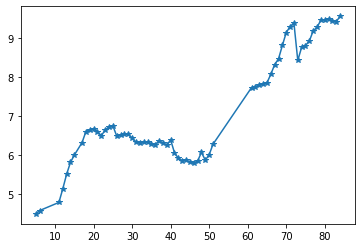

In [8]:
# Vẽ biểu đồ giữa thời gian theo tháng và giá gạo
plt.plot(df_rice.Time, df_rice.Price, marker = "*")
plt.show()

- Giả thuyết không: Giữa thời gian và giá gạo không có mối tương quan
- Giả thuyết đối: Giữa thời gian và giá dạo có mối tường quan

In [10]:
stats.pearsonr(df_rice.Time, df_rice.Price)

(0.8836736355854854, 8.931326276853385e-23)

=> Kết luận: Do pvalue ~ 0 và hệ số tương quan bằng 0.88 nên giữa thời gian và giá gạo có mối tương quan chặt chẽ với nhau